<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/Key_point_of_Ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. How are cofficents affected?



In [41]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = load_diabetes()

In [43]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['TARGET'] = data.target

In [44]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [45]:
df.shape

(442, 11)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg  = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)

    # r2_score was likely overwritten as a list. Call the imported function instead
    r2_scores.append(r2_score(y_test,y_pred))

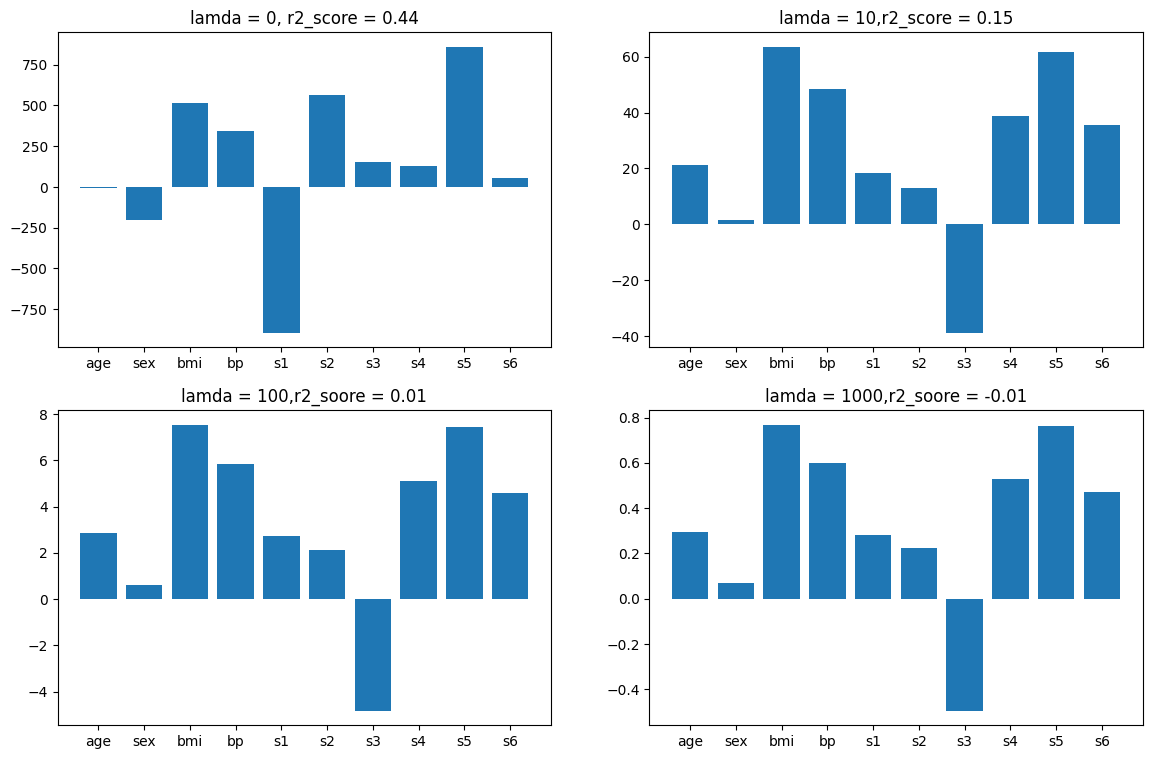

In [47]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('lamda = 0, r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('lamda = 10,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('lamda = 100,r2_soore = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('lamda = 1000,r2_soore = {}'.format(round(r2_scores[3],2)))
plt.show()

# 2. Higher Coefficients are affected more

In [48]:
lamda = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in lamda:
  reg = Ridge(alpha=i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())

In [49]:
input_array  = np.array(coefs)

In [50]:
coef_df = pd.DataFrame(input_array,columns = data.feature_names)
coef_df['lamda'] = lamda
coef_df.set_index('lamda')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
lamda,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [51]:
lamda = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in lamda:
  reg = Ridge(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())

In [52]:
input_array = np.array(coefs).T

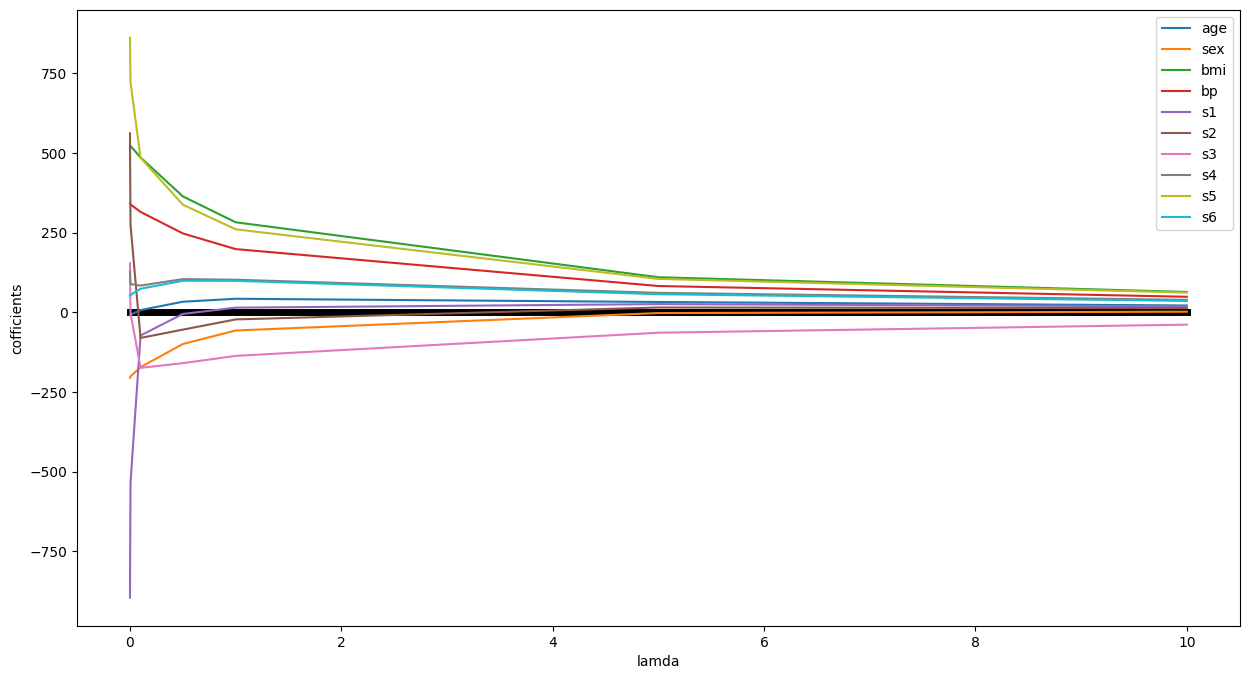

In [53]:
plt.figure(figsize = (15,8))
plt.plot(lamda,np.zeros(len(lamda)),color = 'black',linewidth = 5)
for i in range(input_array.shape[0]):
    plt.plot(lamda,input_array[i],label= data.feature_names[i])

plt.xlabel('lamda')
plt.ylabel('cofficients')
plt.legend()

#3. Impact on Bias and Variance

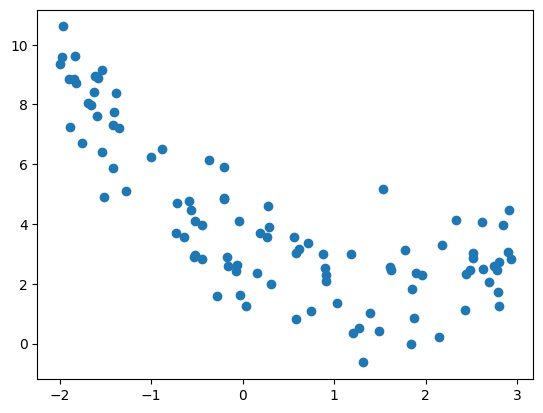

In [54]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [57]:
!pip install mlxtend

In [58]:
from mlxtend.evaluate import bias_variance_decomp

lamdas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in lamdas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

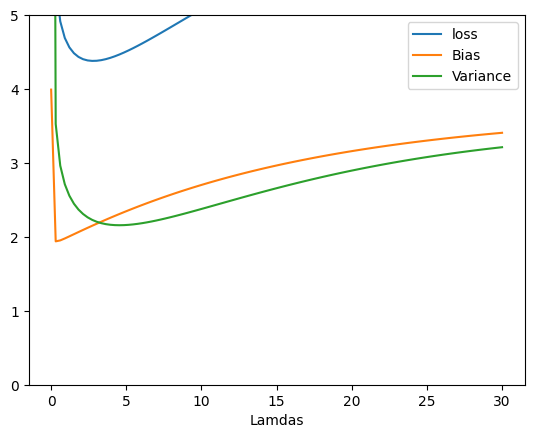

In [59]:
plt.plot(lamdas,loss,label='loss')
plt.plot(lamdas,bias,label='Bias')
plt.plot(lamdas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Lamdas')
plt.legend()

#4. Effect of Regularization on Loaa Function

[27.82809103]
-2.29474455867698


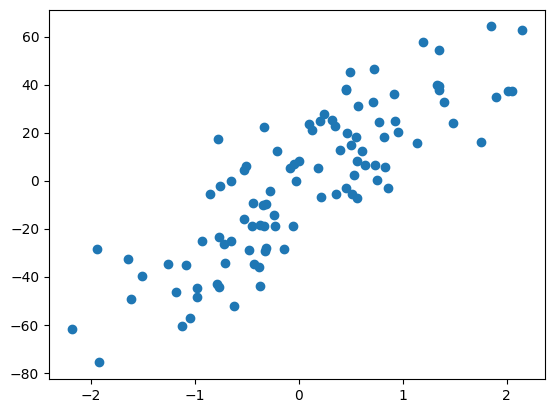

In [60]:
from sklearn.datasets import make_regression


X,y = make_regression(n_samples = 100,n_features =1,n_informative=1, n_targets = 1,noise =20,random_state = 13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [61]:
def cal_loss(m,alpha):
  return np.sum((y-m*X.ravel() + 2.29)**2) + alpha*m*m

In [62]:
def predict(m):
  return m*X-  2.29

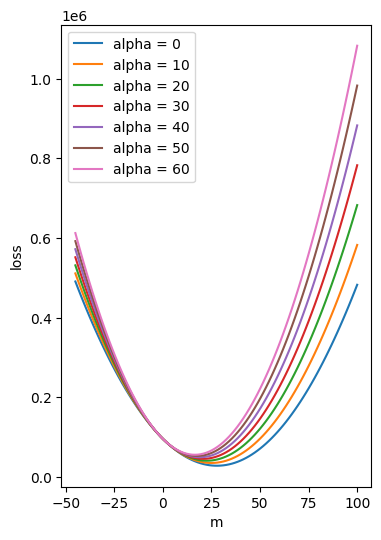

In [63]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,60]:
  loss = []
  for i in range(m.shape[0]):
    loss_i = cal_loss(m[i],j)
    loss.append(loss_i)
  plt.plot(m,loss,label = 'alpha = {}'.format(j))

plt.legend()
plt.xlabel('m')
plt.ylabel('loss')
plt.show()

# for 2 cofficeents